**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

BLACK = 0
MEDIUM_GRAY = 127
WHITE = 255

max = 256

def readImage(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def getLocalTime() -> str:
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)


def showImage(image, cmap = 'gray') -> None:
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)


def showImages(images, cmap = 'gray') -> None:
    _, axs = plt.subplots(nrows=1, ncols=len(images))

    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = cmap, vmin = BLACK, vmax = WHITE)

    plt.tight_layout()

def saveImage(image, filename = 'result', cmap = 'gray', mode = 'sync') -> None:    
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

    if mode == 'sync':
        plt.show()


In [29]:
ROBERTS         = 0
PREWITT         = 1
SOBEL           = 2
LAPLACIANO_4    = 3
LAPLACIANO_8    = 4

def getMasks():
    robertsMask = (
        np.array([
            [1, 0],
            [0, -1]
        ]),
        np.array([
            [0, 1],
            [-1, 0]
        ]),
    )
    prewittMask = (
        np.array([
            [-1, -1, -1],
            [0, 0, 0],
            [1, 1, 1],
        ]),
        np.array([
            [-1, 0, 1],
            [-1, 0, 1],
            [-1, 0, 1],
        ]),
    )
    sobelMask = (
        np.array([
            [-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1],
        ]),
        np.array([
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1],
        ]),
    )
    laplaceMask4 = (
        np.array([
            [0, 1, 0],
            [1, -4, 1],
            [0, 1, 0],
        ]),
        np.array([
            [0, 1, 0],
            [1, -4, 1],
            [0, 1, 0],
        ]),
    )
    laplaceMask8 = (
        np.array([
            [1, 1, 1],
            [1, -8, 1],
            [1, 1, 1],
        ]),
        np.array([
            [1, 1, 1],
            [1, -8, 1],
            [1, 1, 1],
        ]),
    )
    return (robertsMask, prewittMask, sobelMask, laplaceMask4, laplaceMask8)

def getMask(index):
    masks = getMasks()
    return masks[index]

def applyFilter(image, fil):
    maks = getMask(fil)
    imgX = cv2.filter2D(image, cv2.CV_32F, maks[0])
    imgY = cv2.filter2D(image, cv2.CV_32F, maks[1])
    result = np.sqrt(imgX ** 2 + imgY ** 2)
    
    return result
    
    
    
    
    
    


1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

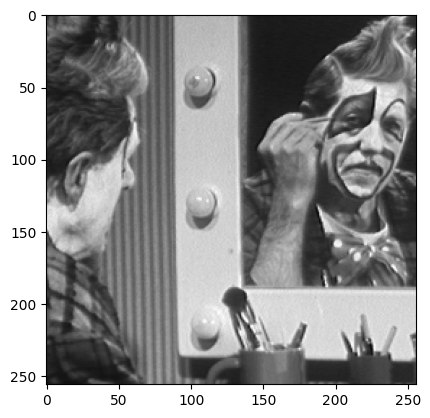

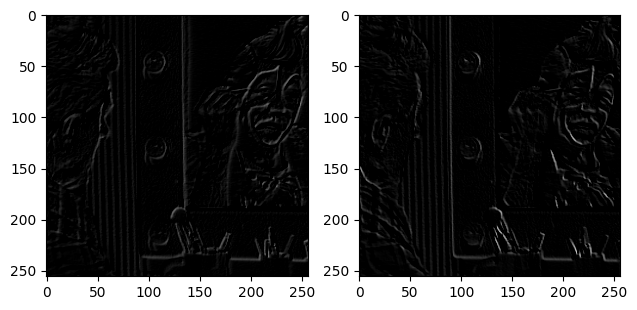

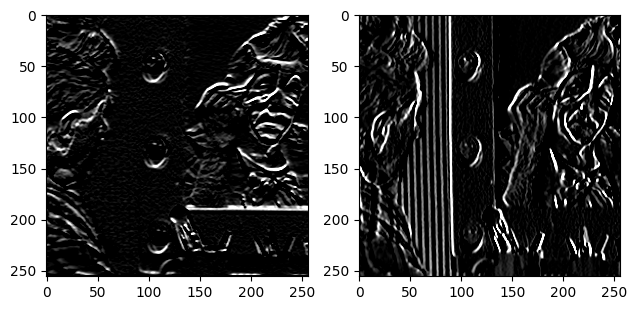

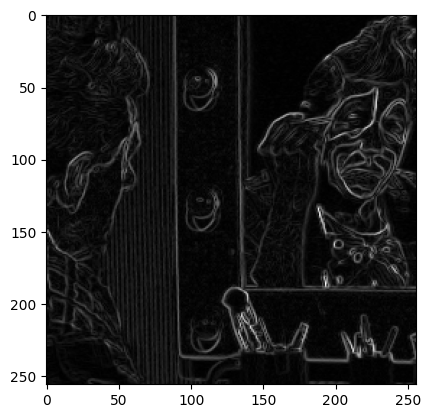

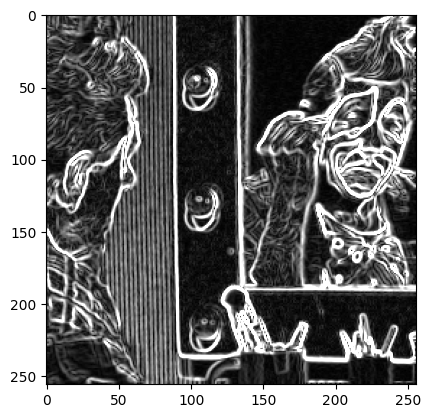

In [30]:
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

robertsMaks = getMask(ROBERTS)
robertsImgX = cv2.filter2D(img1, cv2.CV_32F, robertsMaks[0])
robertsImgY = cv2.filter2D(img1, cv2.CV_32F, robertsMaks[1])

sobelMaks = getMask(SOBEL)
sobelImgX = cv2.filter2D(img1, cv2.CV_32F, sobelMaks[0])
sobelImgY = cv2.filter2D(img1, cv2.CV_32F, sobelMaks[1])

showImages((robertsImgX, robertsImgY))
showImages((sobelImgX, sobelImgY))

showImage(applyFilter(img1, ROBERTS))
showImage(applyFilter(img1, SOBEL))

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

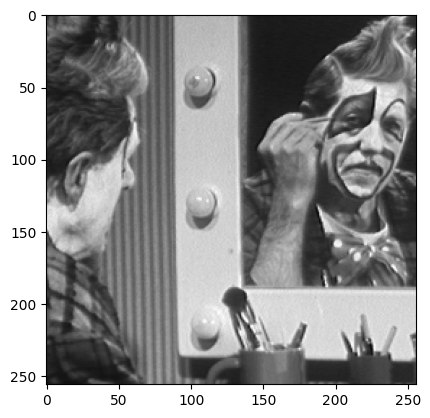

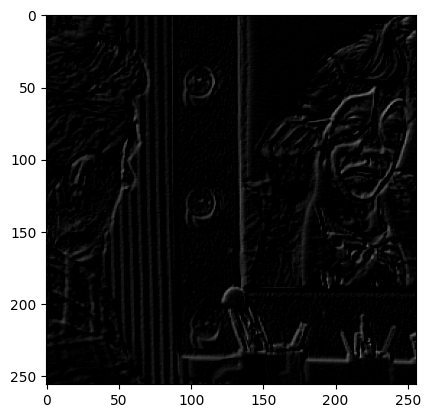

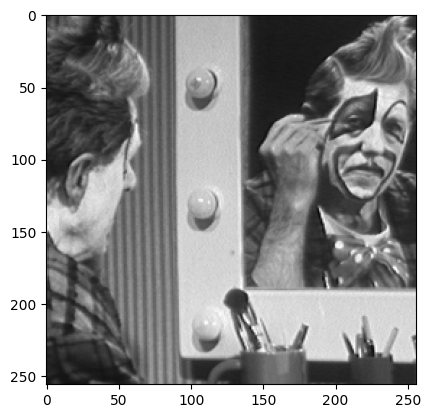

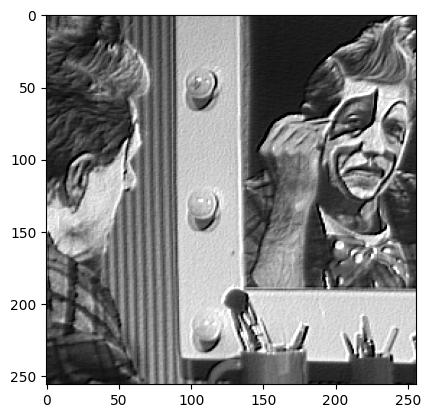

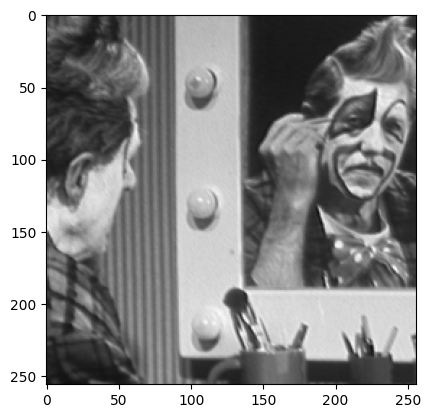

In [62]:
# code here

img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

laplacianoMaks = getMask(LAPLACIANO_4)
laplacianoImg = cv2.filter2D(img1, cv2.CV_32F, laplacianoMaks[0])

showImage(laplacianoImg)
for k in [1, 2, .6]:
    showImage(img1 + k * laplacianoImg)

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

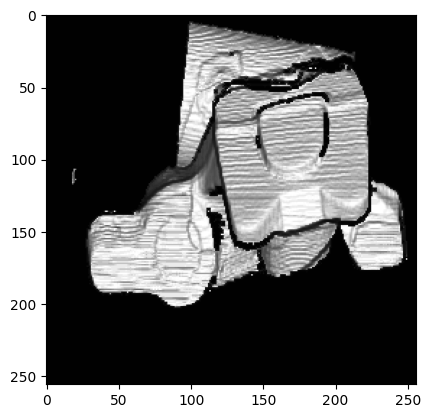

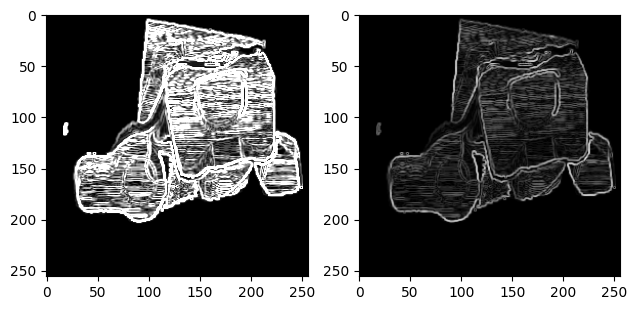

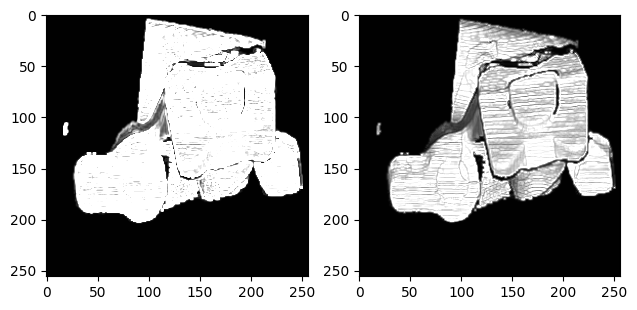

In [54]:
#code here
img2 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

sobelImg = applyFilter(img2, SOBEL)
showImages((sobelImg, .2 * sobelImg))
# showImages((img2 + sobelImg, img2 + .2 * sobelImg))


4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

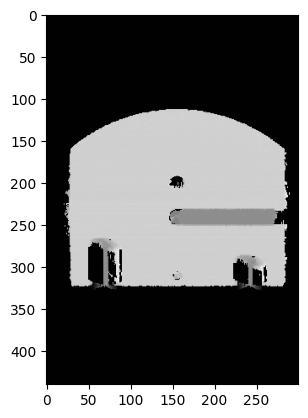

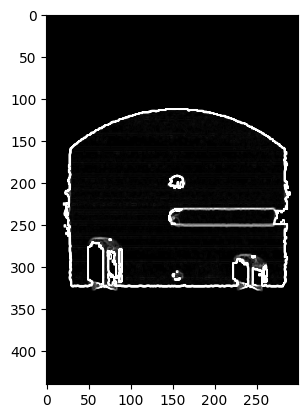

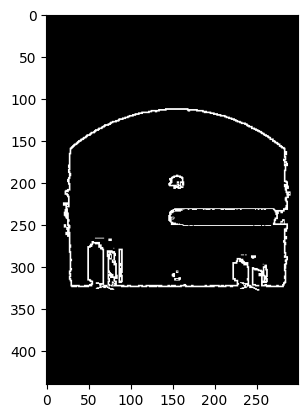

In [60]:

#code here
img3 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

height, width = img3.shape

sobelImg = applyFilter(img3, SOBEL)
showImage(sobelImg)

thresholding = 150

for i in range(height):
    for j in range(width):
        if sobelImg[i][j] > thresholding:
            sobelImg[i][j] = 255
        else:
            sobelImg[i][j] = 0


showImage(sobelImg)

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

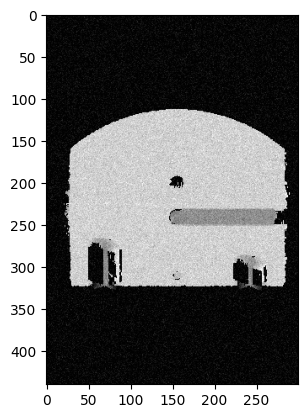

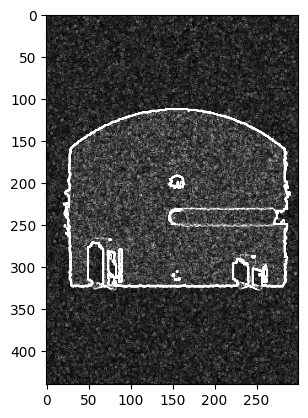

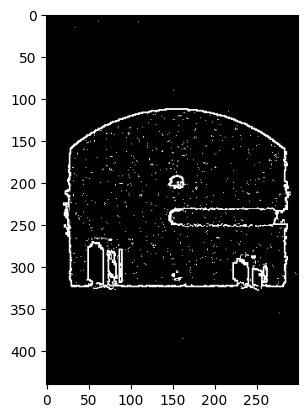

In [61]:
#code here
img4 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

height, width = img4.shape

sobelImg = applyFilter(img4, SOBEL)
showImage(sobelImg)

thresholding = 150

for i in range(height):
    for j in range(width):
        if sobelImg[i][j] > thresholding:
            sobelImg[i][j] = 255
        else:
            sobelImg[i][j] = 0


showImage(sobelImg)